In [8]:
#Importing required libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pygeohash as gd

In [9]:
#all_details : Information related to crime events
#intersections : Information related to patrolling streets that pass through hotspots and its neighbours
#road_mishap : combining above two data based on Input_FID(Unique number for every hexagon i.e. hotspot)


all_details = gpd.read_file('D:\All_details\All_details.shp')
intersection=gpd.read_file('D:\Patrolling_streets\Patroling_streets.shp')
Roads_mishap =pd.merge(all_details, intersection, on='Input_FID')
details_df = pd.DataFrame(Roads_mishap) 

In [10]:
#Checking dimensions for crime events
all_details.shape

(276529, 27)

In [11]:
#Checking dimensions for street info
intersection.shape

(20783, 27)

In [12]:
#Checking dimensions for entire data
details_df.shape

(3571698, 53)

In [13]:
#Converting crimedate column to a datetime format column
details_df['CrimeDate'] = pd.to_datetime(details_df['CrimeDate'])

In [14]:
#Extracting new features from date and time information

details_df['Day'] = details_df['CrimeDate'].dt.day
details_df['Year'] = details_df['CrimeDate'].dt.year
details_df['Month'] = details_df['CrimeDate'].dt.month
details_df['WeekDay'] = details_df['CrimeDate'].dt.weekday

In [15]:
details_df['Year'].value_counts()

2016    648556
2013    644002
2012    634816
2015    622944
2014    587937
2017    433443
Name: Year, dtype: int64

In [16]:
print(details_df.keys())

Index(['OBJECTID', 'Join_Count', 'TARGET_FID', 'CrimeDate', 'CrimeTime',
       'CrimeCode', 'Location', 'Descriptio', 'Inside_Out', 'Weapon', 'Post',
       'District', 'Neighborho', 'Longitude', 'Latitude', 'Location_1',
       'Premise', 'Total_Inci', 'FID_1', 'Id', 'Input_FID', 'Count_',
       'Sum_Post', 'Sum_Longit_x', 'Sum_Latitu_x', 'Sum_Total', 'geometry_x',
       'OBJECTID_x', 'FID_tl_201', 'LINEARID', 'FULLNAME', 'RTTYP', 'MTFCC',
       'FID_Incide', 'FID_1_x', 'Id_x', 'Count__x', 'Sum_Post_x',
       'Sum_Longit_y', 'Sum_Latitu_y', 'Sum_Total_', 'Shape_Leng',
       'OBJECTID_y', 'LENGTH', 'NODE_COUNT', 'FID_1_y', 'Id_y', 'Count__y',
       'Sum_Post_y', 'Sum_Long_1', 'Sum_Lati_1', 'Sum_Tota_1', 'geometry_y',
       'Day', 'Year', 'Month', 'WeekDay'],
      dtype='object')


In [17]:
#Creating a subset of relevant data

details_df=details_df[['CrimeDate','Neighborho','District','CrimeTime','Input_FID','Count__x','Descriptio','FULLNAME','WeekDay','Month','Year','Longitude','Latitude']]

In [18]:
#Handling Missing values
details_df=details_df.dropna()

In [19]:
details_df.head()

,CrimeDate,Neighborho,District,CrimeTime,Input_FID,Count__x,Descriptio,FULLNAME,WeekDay,Month,Year,Longitude,Latitude
0,2017-09-02,Downtown West,CENTRAL,22:31:00,7963,382.0,COMMON ASSAULT,E Lombard St,5,9,2017,-76.61365,39.28756
1,2017-09-02,Downtown West,CENTRAL,22:31:00,7963,382.0,COMMON ASSAULT,E Lombard St,5,9,2017,-76.61365,39.28756
2,2017-09-02,Downtown West,CENTRAL,22:31:00,7963,382.0,COMMON ASSAULT,E Lombard St,5,9,2017,-76.61365,39.28756
3,2017-09-02,Downtown West,CENTRAL,22:31:00,7963,382.0,COMMON ASSAULT,E Lombard St,5,9,2017,-76.61365,39.28756
4,2017-09-02,Downtown West,CENTRAL,22:31:00,7963,382.0,COMMON ASSAULT,E Lombard St,5,9,2017,-76.61365,39.28756


In [20]:
details_df.shape

(3244217, 13)

In [21]:
details_df['CrimeTime'] = details_df['CrimeTime'].str[:2]

In [22]:
#Prelimenary steps for converting crime time to just hour format
details_df['CrimeTime']=details_df['CrimeTime'].replace(['0:', '1:','2:', '3:','4:','5:', '6:', '7:', '8:', '9:'], [0,1,2,3,4,5,6,7,8,9])

In [23]:
#Division of entire day into slots

#● Early morning: 1AM-7AM 
#● Late morning: 8AM-1PM
#● Afternoon: 2PM-7PM
#● Night 8PM-12AM


#Annotations
#Early Morning = 0
details_df['CrimeTime']=details_df['CrimeTime'].replace([1,2,3,4,5,6,7], 0)

In [24]:
#Late Morning = 1
details_df['CrimeTime']=details_df['CrimeTime'].replace([8,9,10,11,12,13], 1)

In [25]:
#Afternoon
details_df['CrimeTime']=details_df['CrimeTime'].replace([20,21,22,23,24], 3)

In [26]:
#● Late morning: 8AM-1PM  : 1

details_df['CrimeTime']=details_df['CrimeTime'].replace(regex={'10': '1'})
details_df['CrimeTime']=details_df['CrimeTime'].replace(regex={'11': '1'})
details_df['CrimeTime']=details_df['CrimeTime'].replace(regex={'12': '1'})
details_df['CrimeTime']=details_df['CrimeTime'].replace(regex={'13': '1'})

In [27]:
#● Afternoon: 2PM-7PM  : 2

details_df['CrimeTime']=details_df['CrimeTime'].replace(regex={'14': '2'})
details_df['CrimeTime']=details_df['CrimeTime'].replace(regex={'15': '2'})
details_df['CrimeTime']=details_df['CrimeTime'].replace(regex={'16': '2'})
details_df['CrimeTime']=details_df['CrimeTime'].replace(regex={'17': '2'})
details_df['CrimeTime']=details_df['CrimeTime'].replace(regex={'18': '2'})
details_df['CrimeTime']=details_df['CrimeTime'].replace(regex={'19': '2'})

In [28]:
#● Night 8PM-12AM : 3

details_df['CrimeTime']=details_df['CrimeTime'].replace(regex={'20': '3'})
details_df['CrimeTime']=details_df['CrimeTime'].replace(regex={'21': '3'})
details_df['CrimeTime']=details_df['CrimeTime'].replace(regex={'22': '3'})
details_df['CrimeTime']=details_df['CrimeTime'].replace(regex={'23': '3'})
details_df['CrimeTime']=details_df['CrimeTime'].replace(regex={'24': '3'})

In [29]:

#Converting data to Int type
details_df['CrimeTime'] = details_df['CrimeTime'].astype(int)

In [30]:
#Monday is 0
details_df['CrimeTime'].value_counts()

2    1126946
1     828379
0     665322
3     623570
Name: CrimeTime, dtype: int64

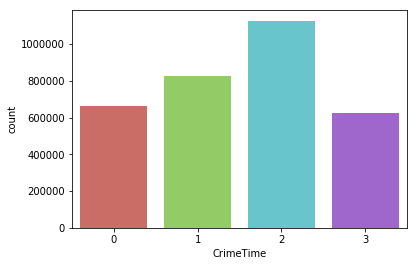

In [31]:

#Plotting crime time in slots

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np
sns.countplot(x=details_df['CrimeTime'],data=details_df,palette='hls')
plt.show()

In [32]:
details_df=details_df.drop(['Input_FID','CrimeDate','Descriptio','Count__x','Longitude','Latitude'],axis=1)

In [33]:

#Converting string values to number before checking feature importance

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [34]:

#Fields that had string values


from sklearn.preprocessing import LabelEncoder
result=MultiColumnLabelEncoder(columns = ['FULLNAME','Neighborho','District']).fit_transform(details_df)

In [35]:
result.head()

,Neighborho,District,CrimeTime,FULLNAME,WeekDay,Month,Year
0,39,0,3,267,5,9,2017
1,39,0,3,267,5,9,2017
2,39,0,3,267,5,9,2017
3,39,0,3,267,5,9,2017
4,39,0,3,267,5,9,2017


[0.23160425 0.04619725 0.45511727 0.07433165 0.19274958]


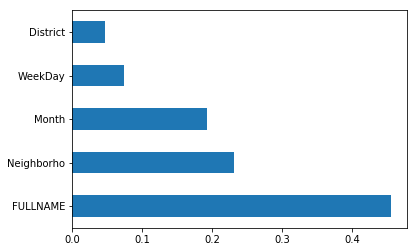

In [26]:

#Feature Importance using ExtraTreesClassifier

import pandas as pd
import numpy as np
#Splitting and Training data
X = result.drop('CrimeTime',axis=1)
y = result['CrimeTime'] 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [27]:
#importing all the required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
import seaborn as sns 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
import sklearn

In [138]:
#Generalizing crime and annotations

details_df['Descriptio']=details_df['Descriptio'].replace(regex={'ASSAULT BY THREAT': 'OTHER'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'SHOOTING': 'OTHER'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'HOMICIDE': 'OTHER'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'ARSON': 'OTHER'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'RAPE': 'OTHER'})

In [139]:
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'LARCENY': '1'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'COMMON ASSAULT': '2'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'BURGLARY': '3'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'LARCENY FROM AUTO': '4'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'AGG. ASSAULT': '5'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'AUTO THEFT': '6'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'ROBBERY': '7'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'OTHER': '8'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'1 FROM AUTO': '1'})

In [140]:
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'LARCENY': '1'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'COMMON ASSAULT': '2'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'BURGLARY': '3'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'LARCENY FROM AUTO': '4'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'AGG. ASSAULT': '5'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'AUTO THEFT': '6'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'ROBBERY': '7'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'OTHER': '8'})
details_df['Descriptio']=details_df['Descriptio'].replace(regex={'1 FROM AUTO': '1'})

In [141]:
details_df['Descriptio'] = details_df['Descriptio'].astype(int)

In [142]:
details_df['Descriptio'].value_counts()

1    467236
2    219615
3    190163
5    133675
7    130022
6    117008
8     52577
Name: Descriptio, dtype: int64

In [29]:

#Reducing data and considering two years of data inorder to provide our Machine Learning Models
#Inorder to reduce overfitting

details_df=details_df[details_df['Year'].isin(['2015','2016'])]

In [30]:
details_df.shape

(1154310, 7)

In [31]:
#Dropping year because it does not show that importance in feature importance

details_df=details_df.drop(['Year'],axis=1)

In [32]:
result.head()

,Neighborho,District,CrimeTime,FULLNAME,WeekDay,Month,Year
0,39,0,3,267,5,9,2017
1,39,0,3,267,5,9,2017
2,39,0,3,267,5,9,2017
3,39,0,3,267,5,9,2017
4,39,0,3,267,5,9,2017


In [36]:
#importing all the required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
import seaborn as sns 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
import sklearn

In [37]:
#Splitting and Training data
X = result.drop('CrimeTime',axis=1)
y = result['CrimeTime'] 

In [40]:
#oversampling to handle imbalanced data : SMOTE
#Standard scalar to normalize data

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Scaler=StandardScaler()
Scaler.fit(X_train)
X_train=Scaler.transform(X_train)
X_test=Scaler.transform(X_test)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

Counter({2: 901979, 1: 662886, 0: 532254, 3: 498254})
Counter({0: 901979, 2: 901979, 1: 901979, 3: 901979})


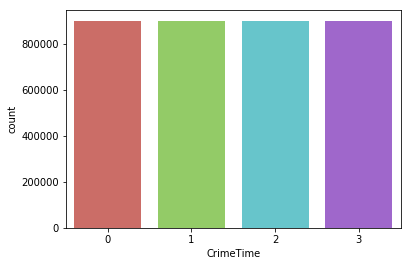

In [41]:
#Now the data is balanced after oversampling
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_smote))
sns.countplot(x=y_train_smote,data=result,palette='hls')
plt.show()

In [43]:
#Random forest Model
#creating classifiers
rfc= RandomForestClassifier(n_estimators=100)

#random forest classifier

rfc.fit(X_train, y_train)
rfcpred=rfc.predict(X_test)

#Performance metrics
print(classification_report(y_test,rfcpred))
confusion_matrix(y_test,rfcpred)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75    133068
           1       0.75      0.74      0.75    165493
           2       0.77      0.80      0.79    224967
           3       0.74      0.72      0.73    125316

    accuracy                           0.76    648844
   macro avg       0.76      0.75      0.75    648844
weighted avg       0.76      0.76      0.76    648844



array([[ 99745,  10699,  14241,   8383],
       [ 10830, 122966,  22124,   9573],
       [ 12799,  19676, 179323,  13169],
       [  9191,   9864,  16061,  90200]], dtype=int64)

In [44]:
#Accuracy for Random Forest without SMOTE

accuracy_score(y_test,rfcpred)

0.7586322752464383

In [38]:
# Decision Tree model
#creating classifiers
c=tree.DecisionTreeClassifier()
#random forest classifier

c.fit(X_train, y_train)
cpred=c.predict(X_test)

#Performance metrics
print(classification_report(y_test,cpred))
confusion_matrix(y_test,cpred)

              precision    recall  f1-score   support

           0       0.74      0.77      0.75    133068
           1       0.75      0.75      0.75    165493
           2       0.78      0.79      0.78    224967
           3       0.76      0.70      0.73    125316

    accuracy                           0.76    648844
   macro avg       0.76      0.75      0.75    648844
weighted avg       0.76      0.76      0.76    648844



array([[102558,  10076,  13015,   7419],
       [ 12158, 124587,  20275,   8473],
       [ 14386,  21478, 177241,  11862],
       [ 10313,  10847,  16673,  87483]], dtype=int64)

In [39]:
#Accuracy for Decision Tree without SMOTE
accuracy_score(y_test,cpred)

0.758069736331075

In [40]:
#Knn( neigh=3)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
#Accuracy for KNN without SMOTE
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.74


In [ ]:
kpred1=knn.predict(X_test)
print(classification_report(y_test,cpred))

In [41]:
#Knn( neigh=5)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.73


In [42]:
#Knn( neigh=7)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.72


In [43]:
#Naive Bayes Model


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.35
Accuracy of GNB classifier on test set: 0.35


In [48]:
#Random forest Model with SMOTE
#creating classifiers
rfc= RandomForestClassifier(n_estimators=100)

#random forest classifier

rfc.fit(X_train_smote, y_train_smote)
rfcpred=rfc.predict(X_test)

#Performance metrics
print(classification_report(y_test,rfcpred))
confusion_matrix(y_test,rfcpred)

              precision    recall  f1-score   support

           0       0.72      0.81      0.76    133068
           1       0.76      0.76      0.76    165493
           2       0.85      0.72      0.78    224967
           3       0.70      0.80      0.75    125316

    accuracy                           0.76    648844
   macro avg       0.76      0.77      0.76    648844
weighted avg       0.77      0.76      0.76    648844



array([[107587,   8450,   7154,   9877],
       [ 13620, 125108,  13688,  13077],
       [ 18647,  23874, 161646,  20800],
       [  9532,   7610,   7671, 100503]], dtype=int64)

In [49]:
accuracy_score(y_test,rfcpred)

0.762654813791913

In [50]:
# Decision Tree model with SMOTE
#creating classifiers
c=tree.DecisionTreeClassifier()
#random forest classifier

c.fit(X_train_smote, y_train_smote)
cpred=c.predict(X_test)

#Performance metrics
print(classification_report(y_test,cpred))
confusion_matrix(y_test,cpred)

              precision    recall  f1-score   support

           0       0.71      0.82      0.76    133068
           1       0.75      0.76      0.76    165493
           2       0.86      0.71      0.78    224967
           3       0.70      0.79      0.74    125316

    accuracy                           0.76    648844
   macro avg       0.76      0.77      0.76    648844
weighted avg       0.77      0.76      0.76    648844



array([[108888,   8124,   6615,   9441],
       [ 14245, 126173,  12480,  12595],
       [ 19414,  24987, 160486,  20080],
       [ 10095,   8087,   8051,  99083]], dtype=int64)

In [51]:
accuracy_score(y_test,cpred)

0.7623249964552342

In [52]:
#Knn( neigh=3) with SMOTE

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_smote, y_train_smote)
knnpred = knn.predict(X_test)
#Performance metrics
print(classification_report(y_test,knnpred))
confusion_matrix(y_test,knnpred)


              precision    recall  f1-score   support

           0       0.68      0.78      0.73    133068
           1       0.73      0.73      0.73    165493
           2       0.81      0.71      0.76    224967
           3       0.70      0.74      0.72    125316

    accuracy                           0.74    648844
   macro avg       0.73      0.74      0.73    648844
weighted avg       0.74      0.74      0.74    648844



array([[104010,   9791,   9680,   9587],
       [ 15612, 121389,  16856,  11636],
       [ 20801,  25407, 159918,  18841],
       [ 11509,  10321,  10436,  93050]], dtype=int64)

In [53]:
accuracy_score(y_test,knnpred)

0.7372604200701556

In [54]:
#Knn( neigh=5) with SMOTE

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)
knnpred = knn.predict(X_test)
#Performance metrics
print(classification_report(y_test,knnpred))
confusion_matrix(y_test,knnpred)

              precision    recall  f1-score   support

           0       0.69      0.78      0.73    133068
           1       0.72      0.73      0.73    165493
           2       0.81      0.70      0.75    224967
           3       0.70      0.74      0.72    125316

    accuracy                           0.73    648844
   macro avg       0.73      0.74      0.73    648844
weighted avg       0.74      0.73      0.73    648844



array([[103818,  10302,   9732,   9216],
       [ 15477, 121529,  16837,  11650],
       [ 20816,  26478, 158426,  19247],
       [ 11313,  10603,  10943,  92457]], dtype=int64)

In [55]:
accuracy_score(y_test,knnpred)

0.7339668703108914

In [56]:
#Knn( neigh=7) with SMOTE

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_smote, y_train_smote)
knnpred = knn.predict(X_test)
#Performance metrics
print(classification_report(y_test,knnpred))
confusion_matrix(y_test,knnpred)

              precision    recall  f1-score   support

           0       0.68      0.78      0.73    133068
           1       0.72      0.73      0.72    165493
           2       0.81      0.69      0.74    224967
           3       0.68      0.75      0.71    125316

    accuracy                           0.73    648844
   macro avg       0.72      0.73      0.73    648844
weighted avg       0.73      0.73      0.73    648844



array([[103245,  10398,   9568,   9857],
       [ 15434, 120079,  17106,  12874],
       [ 21674,  27035, 155459,  20799],
       [ 11041,  10111,  10787,  93377]], dtype=int64)

In [57]:
accuracy_score(y_test,knnpred)

0.7276941761039634

In [58]:
#Naive Bayes Model


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_smote, y_train_smote)
gnbpred = gnb.predict(X_test)
#Performance metrics
print(classification_report(y_test,gnbpred))
confusion_matrix(y_test,gnbpred)

              precision    recall  f1-score   support

           0       0.26      0.43      0.32    133068
           1       0.29      0.45      0.35    165493
           2       0.39      0.08      0.14    224967
           3       0.21      0.21      0.21    125316

    accuracy                           0.27    648844
   macro avg       0.29      0.29      0.26    648844
weighted avg       0.30      0.27      0.25    648844



array([[56875, 44687,  7311, 24195],
       [47779, 73701, 13523, 30490],
       [68541, 93482, 19078, 43866],
       [44021, 45705,  8753, 26837]], dtype=int64)

In [59]:
accuracy_score(y_test,gnbpred)

0.2720083718120226

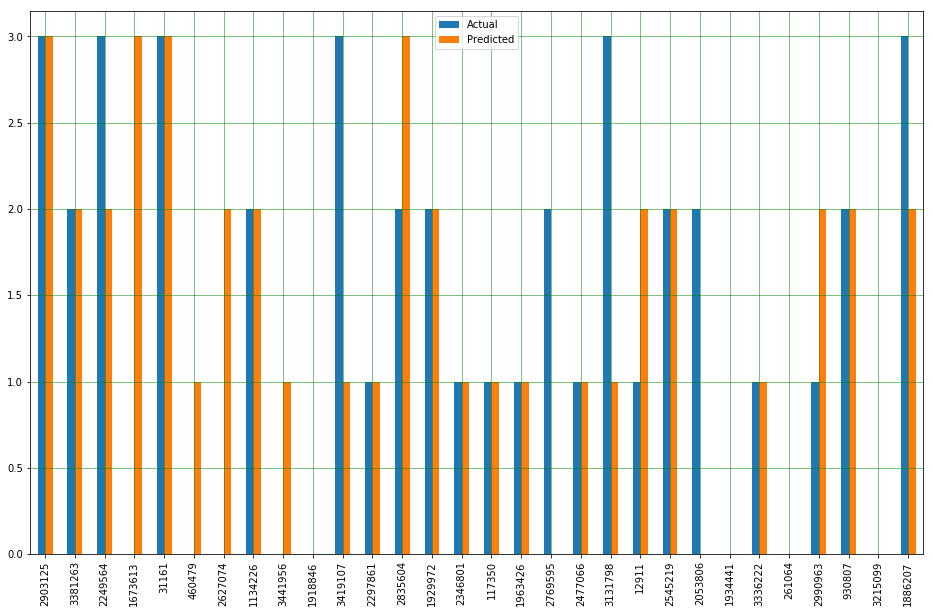

In [32]:
df1 = df.head(30)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [33]:
df.head()

,Actual,Predicted
2903125,3,3
3381263,2,2
2249564,3,2
1673613,0,3
31161,3,3


In [ ]:
#Now we start all the process required for creating crime slot reports using our trained models





In [164]:
all_details = gpd.read_file('D:\All_details\All_details.shp')
intersection=gpd.read_file('D:\Patrolling_streets\Patroling_streets.shp')
Roads_mishap =pd.merge(all_details, intersection, on='Input_FID')
details_df = pd.DataFrame(Roads_mishap) 

In [165]:
details_df.head()

,OBJECTID,Join_Count,TARGET_FID,CrimeDate,CrimeTime,CrimeCode,Location,Descriptio,Inside_Out,Weapon,...,LENGTH,NODE_COUNT,FID_1_y,Id_y,Count__y,Sum_Post_y,Sum_Long_1,Sum_Lati_1,Sum_Tota_1,geometry_y
0,5,1,4,2017-09-02,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,...,300.000056,0.0,4761.0,0.0,382.0,42512.0,-29266.4287,15008.05991,382.0,"MULTILINESTRING ((-76.61366 39.28778, -76.6130..."
1,5,1,4,2017-09-02,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,...,299.999789,0.0,4761.0,0.0,382.0,42512.0,-29266.4287,15008.05991,382.0,"MULTILINESTRING ((-76.61366 39.28778, -76.6130..."
2,5,1,4,2017-09-02,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,...,299.999954,0.0,4761.0,0.0,382.0,42512.0,-29266.4287,15008.05991,382.0,"MULTILINESTRING ((-76.61366 39.28778, -76.6130..."
3,5,1,4,2017-09-02,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,...,299.999789,0.0,4761.0,0.0,382.0,42512.0,-29266.4287,15008.05991,382.0,"MULTILINESTRING ((-76.61366 39.28778, -76.6130..."
4,5,1,4,2017-09-02,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,...,299.999954,0.0,4761.0,0.0,382.0,42512.0,-29266.4287,15008.05991,382.0,"MULTILINESTRING ((-76.61366 39.28778, -76.6130..."


In [166]:
print(details_df.keys())

Index(['OBJECTID', 'Join_Count', 'TARGET_FID', 'CrimeDate', 'CrimeTime',
       'CrimeCode', 'Location', 'Descriptio', 'Inside_Out', 'Weapon', 'Post',
       'District', 'Neighborho', 'Longitude', 'Latitude', 'Location_1',
       'Premise', 'Total_Inci', 'FID_1', 'Id', 'Input_FID', 'Count_',
       'Sum_Post', 'Sum_Longit_x', 'Sum_Latitu_x', 'Sum_Total', 'geometry_x',
       'OBJECTID_x', 'FID_tl_201', 'LINEARID', 'FULLNAME', 'RTTYP', 'MTFCC',
       'FID_Incide', 'FID_1_x', 'Id_x', 'Count__x', 'Sum_Post_x',
       'Sum_Longit_y', 'Sum_Latitu_y', 'Sum_Total_', 'Shape_Leng',
       'OBJECTID_y', 'LENGTH', 'NODE_COUNT', 'FID_1_y', 'Id_y', 'Count__y',
       'Sum_Post_y', 'Sum_Long_1', 'Sum_Lati_1', 'Sum_Tota_1', 'geometry_y'],
      dtype='object')


In [167]:
details_df=details_df[['Neighborho','District','FULLNAME','Input_FID']]

In [168]:
details_df

,Neighborho,District,FULLNAME,Input_FID
0,Downtown West,CENTRAL,E Lombard St,7963
1,Downtown West,CENTRAL,E Lombard St,7963
2,Downtown West,CENTRAL,E Lombard St,7963
3,Downtown West,CENTRAL,E Lombard St,7963
4,Downtown West,CENTRAL,E Lombard St,7963
5,Downtown West,CENTRAL,E Lombard St,7963
6,Downtown West,CENTRAL,Lovegrove St,7963
7,Downtown West,CENTRAL,Lovegrove St,7963
8,Downtown West,CENTRAL,Lovegrove St,7963
9,Downtown West,CENTRAL,Lovegrove St,7963


In [138]:
details_df.head()

,Neighborho,District,FULLNAME,Input_FID
0,Downtown West,CENTRAL,E Lombard St,7963
1,Downtown West,CENTRAL,E Lombard St,7963
2,Downtown West,CENTRAL,E Lombard St,7963
3,Downtown West,CENTRAL,E Lombard St,7963
4,Downtown West,CENTRAL,E Lombard St,7963


In [139]:
details_df.tail()

,Neighborho,District,FULLNAME,Input_FID
3571693,Orangeville Industrial Ar,NORTHEASTERN,None,10233
3571694,Middle Branch/Reedbird Pa,SOUTHERN,None,4791
3571695,Middle Branch/Reedbird Pa,SOUTHERN,None,4791
3571696,Middle Branch/Reedbird Pa,SOUTHERN,S Hanover St,4791
3571697,Middle Branch/Reedbird Pa,SOUTHERN,State Hwy 2,4791


In [169]:
details_df = details_df.drop_duplicates('FULLNAME', keep='first')

In [170]:
details_df

,Neighborho,District,FULLNAME,Input_FID
0,Downtown West,CENTRAL,E Lombard St,7963
6,Downtown West,CENTRAL,Lovegrove St,7963
12,Downtown West,CENTRAL,Water St,7963
18,Downtown West,CENTRAL,Mercer St,7963
24,Downtown West,CENTRAL,Grant St,7963
30,Downtown West,CENTRAL,State Hwy 2,7963
36,Downtown West,CENTRAL,Light St,7963
26740,Cherry Hill,SOUTHERN,Bridgeview Rd,4605
26746,Cherry Hill,SOUTHERN,Cherrycrest Rd,4605
26752,Cherry Hill,SOUTHERN,None,4605


In [173]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
input=MultiColumnLabelEncoder(columns = ['FULLNAME','Neighborho','District']).fit_transform(details_df)

In [119]:
input['Month']=10

In [120]:
input['Weekday']=5

In [121]:
input.head(20)

,Neighborho,District,FULLNAME,Input_FID,Month,Weekday
0,39,0,267,7963,10,5
1,39,0,267,7963,10,5
2,39,0,267,7963,10,5
3,39,0,267,7963,10,5
4,39,0,267,7963,10,5
5,39,0,267,7963,10,5
6,39,0,539,7963,10,5
7,39,0,539,7963,10,5
8,39,0,539,7963,10,5
9,39,0,539,7963,10,5


In [122]:
input= input.drop_duplicates(subset='FULLNAME', keep="first")

In [160]:
input

,Neighborho,District,FULLNAME,Input_FID,Month,Weekday
0,39,0,267,7963,10,5
6,39,0,539,7963,10,5
12,39,0,1111,7963,10,5
18,39,0,578,7963,10,5
24,39,0,375,7963,10,5
30,39,0,964,7963,10,5
36,39,0,520,7963,10,5
26740,29,6,92,4605,10,5
26746,29,6,130,4605,10,5
26758,29,6,926,4605,10,5


In [161]:
details_df

,Neighborho,District,FULLNAME,Input_FID
0,Downtown West,CENTRAL,E Lombard St,7963
6,Downtown West,CENTRAL,Lovegrove St,7963
12,Downtown West,CENTRAL,Water St,7963
18,Downtown West,CENTRAL,Mercer St,7963
24,Downtown West,CENTRAL,Grant St,7963
30,Downtown West,CENTRAL,State Hwy 2,7963
36,Downtown West,CENTRAL,Light St,7963
26740,Cherry Hill,SOUTHERN,Bridgeview Rd,4605
26746,Cherry Hill,SOUTHERN,Cherrycrest Rd,4605
26752,Cherry Hill,SOUTHERN,None,4605


In [51]:
rfcpred_daily=rfc.predict(input)

In [52]:
rfcpred_daily = pd.DataFrame(rfcpred_daily) 

In [53]:
rfcpred_daily = rfcpred_daily.astype(int)

In [159]:
details_df.shape

(1165, 4)

In [55]:
rfcpred_daily.shape

(1164, 1)

In [97]:
details_df= details_df.drop_duplicates(subset='FULLNAME', keep="first")

In [98]:
details_df.shape

(1164, 4)

In [142]:
report=pd.concat([details_df,rfcpred_daily],axis=1)

In [143]:
report

,Neighborho,District,FULLNAME,Input_FID,0
0,Downtown West,CENTRAL,E Lombard St,7963.0,1.0
1,NaN,NaN,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,1.0
4,NaN,NaN,NaN,NaN,1.0
5,NaN,NaN,NaN,NaN,1.0
6,Downtown West,CENTRAL,Lovegrove St,7963.0,1.0
7,NaN,NaN,NaN,NaN,2.0
8,NaN,NaN,NaN,NaN,2.0
9,NaN,NaN,NaN,NaN,2.0


In [144]:
report=report.dropna()

In [145]:
report.shape

(7, 5)

In [107]:
print(report.keys())

Index(['Neighborho', 'District', 'FULLNAME', 'Month', 'Weekday', 0], dtype='object')


In [76]:
report=report.rename(columns={0: "Predicted time slot"})

In [109]:
report=report.rename(columns={"geometry_y": "geometry"})

In [77]:
report['Predicted time slot'] = report['Predicted time slot'].astype(int)

In [78]:
report['Input_FID'] = report['Input_FID'].astype(int)

In [93]:
report.shape

(7, 5)

In [199]:
test=report[report['Input_FID']==8996]

In [200]:
test['Predicted time slot'].value_counts()

0    13212
1     2436
Name: Predicted time slot, dtype: int64

In [80]:
counts_detail = gpd.read_file('D:\Counts\counts_data.shp')

In [89]:
rep_merge =pd.merge(report, counts_detail, on='Input_FID')

In [92]:
rep_merge

,Neighborho,District,FULLNAME,Input_FID,Predicted time slot,FID_1,Id,Count_,Sum_Post,Sum_Longit,Sum_Latitu,Sum_Total,geometry
0,Downtown West,CENTRAL,E Lombard St,7963,1,4761,0,382,42512,-29266.4287,15008.05991,382,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
1,Downtown West,CENTRAL,Lovegrove St,7963,1,4761,0,382,42512,-29266.4287,15008.05991,382,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
2,Downtown West,CENTRAL,Water St,7963,1,4761,0,382,42512,-29266.4287,15008.05991,382,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
3,Downtown West,CENTRAL,Mercer St,7963,2,4761,0,382,42512,-29266.4287,15008.05991,382,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
4,Downtown West,CENTRAL,Grant St,7963,2,4761,0,382,42512,-29266.4287,15008.05991,382,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
5,Downtown West,CENTRAL,State Hwy 2,7963,2,4761,0,382,42512,-29266.4287,15008.05991,382,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
6,Downtown West,CENTRAL,Light St,7963,1,4761,0,382,42512,-29266.4287,15008.05991,382,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."


In [91]:
rep_merge

,Neighborho,District,FULLNAME,Input_FID,Predicted time slot,FID_1,Id,Count_,Sum_Post,Sum_Longit,Sum_Latitu,Sum_Total,geometry
0,Downtown West,CENTRAL,E Lombard St,7963,1,4761,0,382,42512,-29266.4287,15008.05991,382,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
1,Downtown West,CENTRAL,Lovegrove St,7963,1,4761,0,382,42512,-29266.4287,15008.05991,382,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
2,Downtown West,CENTRAL,Water St,7963,1,4761,0,382,42512,-29266.4287,15008.05991,382,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
3,Downtown West,CENTRAL,Mercer St,7963,2,4761,0,382,42512,-29266.4287,15008.05991,382,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
4,Downtown West,CENTRAL,Grant St,7963,2,4761,0,382,42512,-29266.4287,15008.05991,382,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
5,Downtown West,CENTRAL,State Hwy 2,7963,2,4761,0,382,42512,-29266.4287,15008.05991,382,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
6,Downtown West,CENTRAL,Light St,7963,1,4761,0,382,42512,-29266.4287,15008.05991,382,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."


In [169]:
test=rep_merge[rep_merge['Input_FID']==7963]

In [170]:
test['Predicted time slot'].value_counts()

1    7
Name: Predicted time slot, dtype: int64

In [85]:
rep_merge = rep_merge[['Neighborho', 'District', 'FULLNAME','Input_FID','Predicted time slot', 'geometry']]

In [87]:
rep_merge

,Neighborho,District,FULLNAME,Input_FID,Predicted time slot,geometry
0,Downtown West,CENTRAL,E Lombard St,7963,1,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
1,Downtown West,CENTRAL,Lovegrove St,7963,1,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
2,Downtown West,CENTRAL,Water St,7963,1,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
3,Downtown West,CENTRAL,Mercer St,7963,2,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
4,Downtown West,CENTRAL,Grant St,7963,2,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
5,Downtown West,CENTRAL,State Hwy 2,7963,2,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
6,Downtown West,CENTRAL,Light St,7963,1,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."


In [148]:
rep_merge['Input_FID'].value_counts()

7963    7
Name: Input_FID, dtype: int64

In [117]:
import geopandas
report = geopandas.GeoDataFrame(report)

In [118]:
report.to_file('D:Crimetime_report2.shp')

In [149]:
read_report=gpd.read_file('D:Crimetime_report.shp')

In [150]:
read_report

,Neighborho,District,FULLNAME,Predicted,geometry
0,Downtown West,CENTRAL,E Lombard St,1,"MULTILINESTRING ((-76.61366 39.28778, -76.6130..."
1,Downtown West,CENTRAL,E Lombard St,1,"MULTILINESTRING ((-76.61366 39.28778, -76.6130..."
2,Downtown West,CENTRAL,E Lombard St,1,"MULTILINESTRING ((-76.61366 39.28778, -76.6130..."
3,Downtown West,CENTRAL,E Lombard St,1,"MULTILINESTRING ((-76.61366 39.28778, -76.6130..."
4,Downtown West,CENTRAL,E Lombard St,1,"MULTILINESTRING ((-76.61366 39.28778, -76.6130..."
5,Downtown West,CENTRAL,E Lombard St,1,"MULTILINESTRING ((-76.61366 39.28778, -76.6130..."
6,Downtown West,CENTRAL,Lovegrove St,1,"LINESTRING (-76.61373 39.28850, -76.61383 39.2..."
7,Downtown West,CENTRAL,Lovegrove St,1,"LINESTRING (-76.61373 39.28850, -76.61383 39.2..."
8,Downtown West,CENTRAL,Lovegrove St,1,"LINESTRING (-76.61373 39.28850, -76.61383 39.2..."
9,Downtown West,CENTRAL,Lovegrove St,1,"LINESTRING (-76.61373 39.28850, -76.61383 39.2..."


In [183]:
cross_value=pd.crosstab(rep_merge['Input_FID'], rep_merge['Predicted time slot'])

In [184]:
cross_value = pd.DataFrame(cross_value) 

In [185]:
cross_value_merge =pd.merge(rep_merge, cross_value, on='Input_FID')


In [194]:
cross_value_merge

,Neighborho,District,FULLNAME,Input_FID,Predicted time slot,geometry,Early morning,Late morning,Afternoon,Night
0,Downtown West,CENTRAL,E Lombard St,7963,1,"POLYGON ((1421751.784 590469.385, 1421451.784 ...",0,21,0,0
21,Cherry Hill,SOUTHERN,Bridgeview Rd,4605,0,"POLYGON ((1419501.784 576179.966, 1419201.784 ...",3,3,0,0
27,Upton,CENTRAL,W Lanvale St,9239,1,"POLYGON ((1417701.784 595925.345, 1417401.784 ...",14,14,14,0
69,Central Park Heights,NORTHWESTERN,W Belvedere Ave,13128,0,"POLYGON ((1404201.784 612553.033, 1403901.784 ...",9,6,9,0
93,Madison Park,CENTRAL,N Eutaw St,9058,0,"POLYGON ((1419051.784 595145.922, 1418751.784 ...",6,0,0,0
99,Washington Hill,SOUTHEASTERN,S Regester St,8152,0,"POLYGON ((1427601.784 591248.808, 1427301.784 ...",12,0,12,0
123,Better Waverly,NORTHERN,Old York Rd,11319,2,"POLYGON ((1423101.784 604758.804, 1422801.784 ...",12,12,12,0
159,Downtown,CENTRAL,N Liberty St,8328,1,"POLYGON ((1420851.784 592028.231, 1420551.784 ...",0,6,0,0
165,Inner Harbor,CENTRAL,S Charles St,7719,1,"POLYGON ((1421751.784 589430.155, 1421451.784 ...",8,8,0,0
181,Charles North,NORTHERN,E 20th St,10036,0,"POLYGON ((1420851.784 599302.844, 1420551.784 ...",6,0,0,0


In [187]:
cross_value_merge= cross_value_merge.drop_duplicates(subset='Input_FID', keep="first")

In [189]:
cross_value_merge=cross_value_merge.rename(columns={0: "Early morning"})

In [191]:
cross_value_merge=cross_value_merge.rename(columns={1: "Late morning"})

In [192]:
cross_value_merge=cross_value_merge.rename(columns={2: "Afternoon"})

In [193]:
cross_value_merge=cross_value_merge.rename(columns={3: "Night"})

In [195]:
cross_value_merge=cross_value_merge[['Input_FID','Early morning','Late morning','Afternoon','Night','geometry']]
#● Early morning: 1AM-7AM 
#● Late morning: 8AM-1PM
#● Afternoon: 2PM-7PM
#● Night 8PM-12AM

In [196]:
cross_value_merge

,Input_FID,Early morning,Late morning,Afternoon,Night,geometry
0,7963,0,21,0,0,"POLYGON ((1421751.784 590469.385, 1421451.784 ..."
21,4605,3,3,0,0,"POLYGON ((1419501.784 576179.966, 1419201.784 ..."
27,9239,14,14,14,0,"POLYGON ((1417701.784 595925.345, 1417401.784 ..."
69,13128,9,6,9,0,"POLYGON ((1404201.784 612553.033, 1403901.784 ..."
93,9058,6,0,0,0,"POLYGON ((1419051.784 595145.922, 1418751.784 ..."
99,8152,12,0,12,0,"POLYGON ((1427601.784 591248.808, 1427301.784 ..."
123,11319,12,12,12,0,"POLYGON ((1423101.784 604758.804, 1422801.784 ..."
159,8328,0,6,0,0,"POLYGON ((1420851.784 592028.231, 1420551.784 ..."
165,7719,8,8,0,0,"POLYGON ((1421751.784 589430.155, 1421451.784 ..."
181,10036,6,0,0,0,"POLYGON ((1420851.784 599302.844, 1420551.784 ..."


In [197]:
#Exporting shape file for importing in ArcGIS
import geopandas
cross_value_merge = geopandas.GeoDataFrame(cross_value_merge)
cross_value_merge.to_file('D:Time_graph.shp')